In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
%matplotlib inline

#def norm_data(symbol):
goog = pdr.get_data_yahoo('GOOG', start='3/14/2013', end='1/17/2018')
goog.rename(columns={'Adj Close': 'Google'}, inplace=True)
goog.rename(columns={'Volume': 'Vol-Google'}, inplace=True)
goog = goog/(goog.iloc[0,:])

fb = pdr.get_data_yahoo('FB', start='3/14/2013', end='1/17/2018')
fb.rename(columns={'Adj Close': 'Facebook'}, inplace=True)
fb.rename(columns={'Volume': 'Vol-Facebook'}, inplace=True)
fb = fb/(fb.iloc[0,:])

intc = pdr.get_data_yahoo('INTC', start='3/14/2013', end='1/17/2018')
intc.rename(columns={'Adj Close': 'Intel'}, inplace=True)
intc.rename(columns={'Volume': 'Vol-Intel'}, inplace=True)
intc = intc/(intc.iloc[0,:])

wmt = pdr.get_data_yahoo('WMT', start='3/14/2013', end='1/17/2018')
wmt.rename(columns={'Adj Close': 'Walmart'}, inplace=True)
wmt.rename(columns={'Volume': 'Vol-Walmart'}, inplace=True)
wmt = wmt/(wmt.iloc[0,:])

msft = pdr.get_data_yahoo('MSFT', start='3/14/2013', end='1/17/2018')
msft.rename(columns={'Adj Close': 'Microsoft'}, inplace=True)
msft.rename(columns={'Volume': 'Vol-Microsoft'}, inplace=True)
msft = msft/(msft.iloc[0,:])


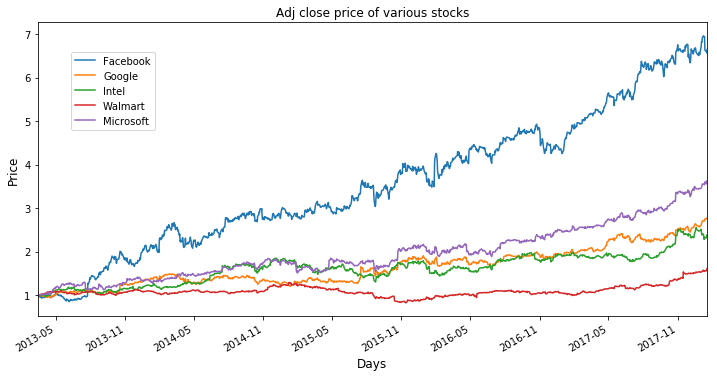

In [2]:
plt.figure(figsize=(12,6))
fb['Facebook'].plot()
goog['Google'].plot()
intc['Intel'].plot()
wmt['Walmart'].plot()
msft['Microsoft'].plot()
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Adj close price of various stocks')
plt.legend(bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.)
plt.savefig('AdjClose-long-term.png')    
plt.show()

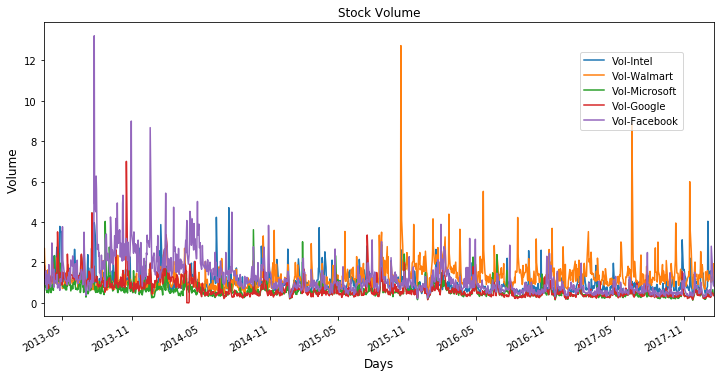

In [3]:
plt.figure(figsize=(12,6))
intc['Vol-Intel'].plot()
wmt['Vol-Walmart'].plot()
msft['Vol-Microsoft'].plot()
goog['Vol-Google'].plot()
fb['Vol-Facebook'].plot()
plt.xlabel('Days', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.title('Stock Volume')
plt.legend(bbox_to_anchor=(0.8, 0.9), loc=2, borderaxespad=0.)
plt.savefig('compare_Vol.png')    

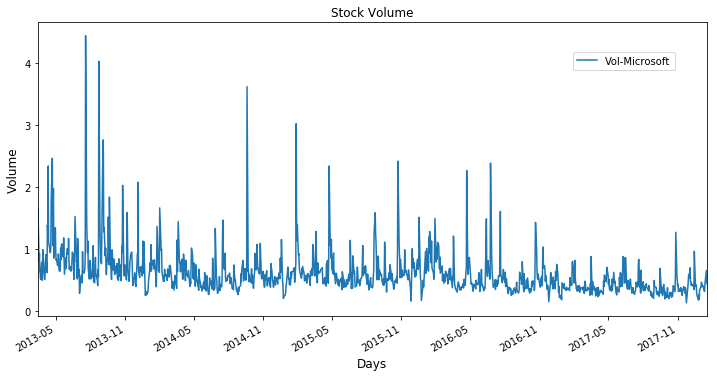

In [4]:
plt.figure(figsize=(12,6))

msft['Vol-Microsoft'].plot()

plt.xlabel('Days', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.title('Stock Volume')
#plt.legend('fbook')

#plt.legend("goog")
plt.legend(bbox_to_anchor=(0.8, 0.9), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('compare_Vol.png')    
#print "The above graph displays Adj close of Facebook and Google."

In [5]:
rm_fb = fb['Facebook'].rolling(20).mean()
#rm_goog = goog['Google'].rolling(20).mean()
std_fb = fb['Facebook'].rolling(20).std()
#std_goog = goog['Google'].rolling(20).std()

In [6]:
std_fb.head(100)

Date
2013-03-14         NaN
2013-03-15         NaN
2013-03-18         NaN
2013-03-19         NaN
2013-03-20         NaN
2013-03-21         NaN
2013-03-22         NaN
2013-03-25         NaN
2013-03-26         NaN
2013-03-27         NaN
2013-03-28         NaN
2013-04-01         NaN
2013-04-02         NaN
2013-04-03         NaN
2013-04-04         NaN
2013-04-05         NaN
2013-04-08         NaN
2013-04-09         NaN
2013-04-10         NaN
2013-04-11    0.030355
2013-04-12    0.031091
2013-04-15    0.031021
2013-04-16    0.031363
2013-04-17    0.031403
2013-04-18    0.031634
2013-04-19    0.031648
2013-04-22    0.031362
2013-04-23    0.029669
2013-04-24    0.027907
2013-04-25    0.027862
                ...   
2013-06-24    0.017705
2013-06-25    0.017892
2013-06-26    0.017375
2013-06-27    0.017686
2013-06-28    0.019105
2013-07-01    0.020373
2013-07-02    0.020217
2013-07-03    0.017976
2013-07-05    0.015030
2013-07-08    0.013428
2013-07-09    0.016810
2013-07-10    0.020590
2013-0

In [7]:
fb.describe()

,Open,High,Low,Close,Facebook,Vol-Facebook
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,3.568990,3.559445,3.568152,3.577693,3.577693,1.236983
std,1.562431,1.549306,1.570884,1.566701,1.566701,0.975198
min,0.848339,0.841779,0.844950,0.846893,0.846893,0.213883
25%,2.470295,2.462632,2.451267,2.477811,2.477811,0.637280
50%,3.402030,3.387532,3.371785,3.409393,3.409393,0.921004
75%,4.618727,4.594513,4.641726,4.627496,4.627496,1.535077
max,6.963100,6.886620,6.983973,6.963017,6.963017,13.219005


In [8]:
rstd_fb = fb['Facebook'].rolling(20).std()
#rstd_goog = goog['Google'].rolling(20).std()

In [9]:
upper_band_fb = rm_fb + rstd_fb * 2
lower_band_fb = rm_fb - rstd_fb * 2
#upper_band_goog = rm_goog + rstd_goog * 2
#lower_band_goog = rm_goog - rstd_goog * 2

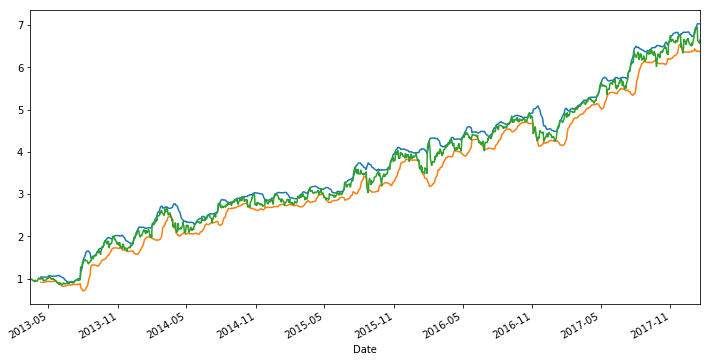

In [10]:
plt.figure(figsize=(12,6))
upper_band_fb.plot()
lower_band_fb.plot()
fb['Facebook'].plot()
plt.savefig('rolling-stdv.png') 
plt.show()